# Markov Decision Process (MDP) - Exemplo

## Importar as bibliotecas

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Definir o ambiente - Labirinto

In [32]:
# Definindo o labirinto
# 0: espaço vazio
# 1: parede
# 9: objetivo
maze = np.array([
    [1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 9, 1],
    [1, 1, 1, 1, 1, 1]
])

## Inicializar valores dos estados

É criada uma matriz V inicializada com zeros para representar os valores dos estados. Essa matriz terá as mesmas dimensões do labirinto.

Taxa de desconto -->É definida uma taxa de desconto (gamma) que afeta como os valores são atualizados.

In [33]:
num_rows, num_cols = maze.shape
V = np.zeros((num_rows, num_cols))

gamma = 0.9

## Função calculate_value
Esta função é responsável por calcular o valor de um estado do labirinto com base em uma ação específica, seguindo a fórmula do Processo de Decisão de Markov (MDP).

`state` e `action` são os parâmetros de entrada da função. state representa a posição atual do agente no labirinto (uma tupla de coordenadas (row, col)), e action é a ação que o agente pretende realizar (uma entre 'up', 'down', 'left' e 'right').

`row` e `col` são extraídos da tupla `state` para representar a linha e a coluna da posição atual do agente no labirinto.

A função começa verificando algumas condições especiais:
* Se o agente estiver na célula de objetivo (representada como 9 no labirinto), o valor desse estado é definido como 1, indicando que o agente alcançou o objetivo com sucesso.
* Se o agente estiver em uma parede (representada como 1 no labirinto), o valor desse estado é definido como 0, indicando que o agente não pode mover-se para uma parede e não há recompensa nessa posição.

* Em seguida, a função calcula o próximo estado next_state com base na ação especificada. Isso envolve a atualização das coordenadas (row, col) de acordo com a ação ('up', 'down', 'left' ou 'right'). O objetivo é determinar para onde o agente se moverá se realizar a ação especificada.

* Finalmente, a função calcula o valor do estado atual usando a fórmula MDP. O valor é calculado como uma combinação ponderada do valor do próximo estado next_state e do valor atual V[row, col]. A ponderação é determinada pelas probabilidades de sucesso e falha da ação (0.8 para sucesso e 0.2 para falha) e pela taxa de desconto gamma. Isso reflete como o agente considera os possíveis resultados de sua ação ao calcular o valor do estado atual.

Essencialmente, a função calculate_value representa a lógica de como o valor de um estado é atualizado com base nas ações possíveis e nas recompensas associadas. Isso desempenha um papel fundamental no algoritmo de iteração de valor, onde os valores dos estados são iterativamente refinados para encontrar a política ótima.

In [34]:
# Função para calcular o valor de um estado usando a fórmula do MDP
def calculate_value(state, action):
    row, col = state
    if maze[row, col] == 9:  # Objetivo
        return 1
    if maze[row, col] == 1:  # Parede
        return 0

    next_state = (row, col)
    if action == 'up':
        next_state = (max(row - 1, 0), col)
    elif action == 'down':
        next_state = (min(row + 1, num_rows - 1), col)
    elif action == 'left':
        next_state = (row, max(col - 1, 0))
    elif action == 'right':
        next_state = (row, min(col + 1, num_cols - 1))

    return gamma * (0.8 * V[next_state[0], next_state[1]] + 0.2 * V[row, col])

## Algoritmo de iteração de valor
A iteração de valor é um método para encontrar a política ótima em um Processo de Decisão de Markov (MDP) e é comumente usado em aprendizado por reforço. O objetivo principal é determinar os valores dos estados em um ambiente de forma iterativa, até que esses valores converjam para seus valores verdadeiros sob uma política ótima. Aqui está uma explicação passo a passo do algoritmo:

1. Inicialização dos Valores dos Estados:

* No início, uma matriz V é criada, onde cada elemento V[row, col] representa o valor estimado do estado correspondente no labirinto.
* Todos os valores iniciais são inicializados como zero, exceto para as paredes (células com valor 1), que têm valor zero, e o objetivo (célula com valor 9), que tem valor inicial 1.

2. Definição dos Parâmetros:

* A taxa de desconto (gamma) é definida. O desconto é um fator que representa a importância das recompensas futuras em relação às recompensas imediatas. Valores típicos para gamma estão na faixa de 0,0 a 1,0.

3. Iteração Principal:

* O algoritmo entra em um loop principal, que continua até que uma condição de parada seja atendida. A condição de parada geralmente envolve verificar se a mudança nos valores dos estados em uma iteração é pequena o suficiente.

4. Cálculo dos Novos Valores dos Estados:

* Para cada estado no labirinto (exceto as paredes):
    * O algoritmo calcula um novo valor para o estado atual usando a função calculate_value. Essa função leva em consideração todas as ações possíveis a partir do estado atual e calcula o valor esperado dessas ações, levando em consideração as recompensas e os valores dos estados resultantes.
    * O valor do estado atual é atualizado com o novo valor calculado.

5. Verificação de Convergência:

* Após atualizar todos os valores dos estados, o algoritmo verifica a mudança máxima (delta) nos valores dos estados em relação à iteração anterior. Se essa mudança for menor que um valor de limiar pré-definido (neste caso, 1e-6), o algoritmo considera que os valores dos estados convergiram e interrompe a iteração.

6. Visualização dos Resultados:

* Após cada iteração, o código exibe informações sobre a iteração atual, incluindo os valores dos estados e a maior mudança (delta). Também plota um mapa visual do labirinto com os valores dos estados atuais para fornecer uma representação gráfica do progresso.

7. Finalização e Saída:

* Após a convergência, o algoritmo imprime os valores finais dos estados e exibe o mapa final com os valores.

Iteração 10:
Valores de cada estado:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Delta (Maior diferença entre os valores): 1.0



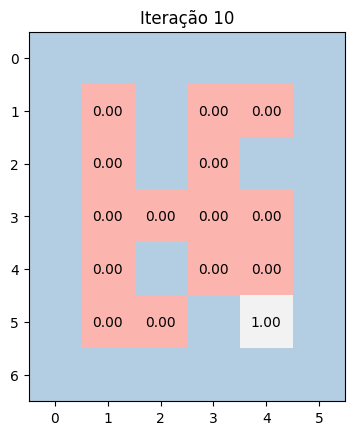

Iteração 11:
Valores de cada estado:
[[0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.72 0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]
Delta (Maior diferença entre os valores): 0.7200000000000001



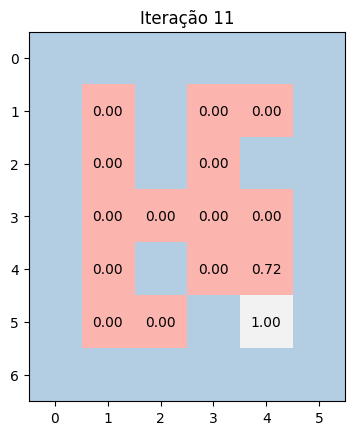

Iteração 12:
Valores de cada estado:
[[0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.5184 0.    ]
 [0.     0.     0.     0.5184 0.8496 0.    ]
 [0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
Delta (Maior diferença entre os valores): 0.5184000000000001



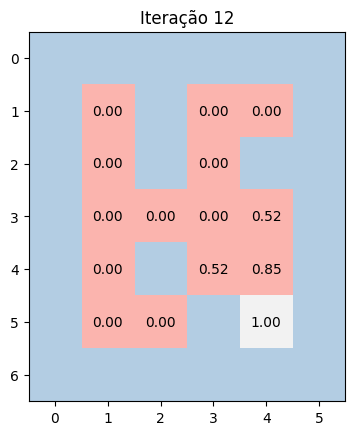

Iteração 13:
Valores de cada estado:
[[0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.373248 0.705024 0.      ]
 [0.       0.       0.       0.705024 0.872928 0.      ]
 [0.       0.       0.       0.       1.       0.      ]
 [0.       0.       0.       0.       0.       0.      ]]
Delta (Maior diferença entre os valores): 0.3732480000000001



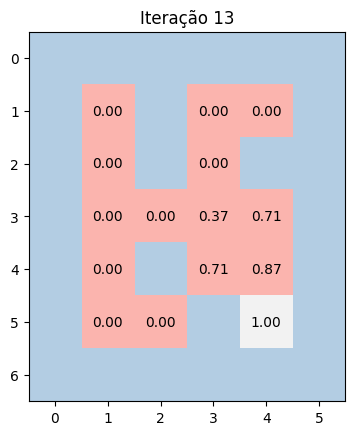

Iteração 14:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.26873856 0.         0.        ]
 [0.         0.         0.26873856 0.57480192 0.75541248 0.        ]
 [0.         0.         0.         0.75541248 0.87712704 0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.26873856000000007



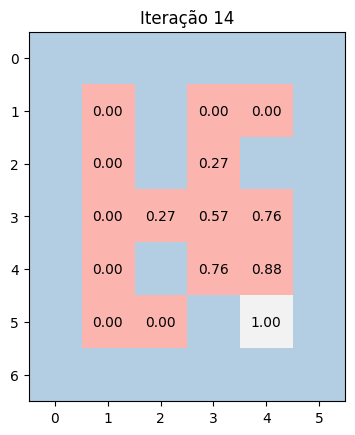

Iteração 15:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.19349176 0.13931407 0.        ]
 [0.         0.         0.         0.46223032 0.         0.        ]
 [0.         0.19349176 0.46223032 0.64736133 0.76750572 0.        ]
 [0.         0.13931407 0.         0.76750572 0.87788287 0.        ]
 [0.         0.10030613 0.07222041 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.1934917632000001



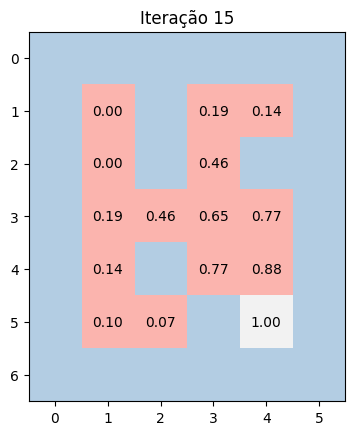

Iteração 16:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.36763435 0.28977326 0.        ]
 [0.         0.13931407 0.         0.54930162 0.         0.        ]
 [0.         0.36763435 0.54930162 0.66912915 0.77022669 0.        ]
 [0.         0.28977326 0.         0.77022669 0.87801892 0.        ]
 [0.         0.22669185 0.17621781 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.17414258688000012



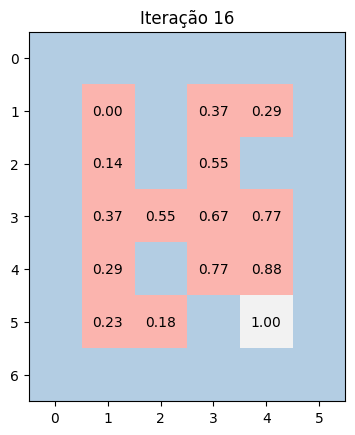

Iteração 17:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.10030613 0.         0.46167135 0.38456256 0.        ]
 [0.         0.28977326 0.         0.58064728 0.         0.        ]
 [0.         0.46167135 0.58064728 0.67500647 0.77081442 0.        ]
 [0.         0.38456256 0.         0.77081442 0.8780434  0.        ]
 [0.         0.31768958 0.2604557  0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.15045919506432012



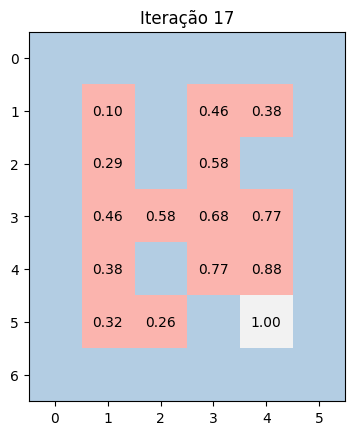

Iteração 18:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.22669185 0.         0.50116689 0.43006142 0.        ]
 [0.         0.38456256 0.         0.59052117 0.         0.        ]
 [0.         0.50116689 0.59052117 0.67648755 0.77093785 0.        ]
 [0.         0.43006142 0.         0.77093785 0.87804781 0.        ]
 [0.         0.36682834 0.31099843 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.1263857238540289



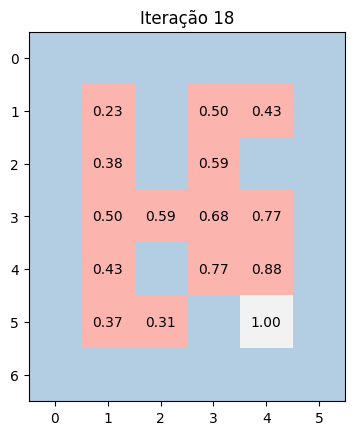

Iteração 19:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.31768958 0.         0.51538528 0.44848846 0.        ]
 [0.         0.43006142 0.         0.59336485 0.         0.        ]
 [0.         0.51538528 0.59336485 0.67684301 0.77096324 0.        ]
 [0.         0.44848846 0.         0.77096324 0.87804861 0.        ]
 [0.         0.38894079 0.33601709 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.09099772117490076



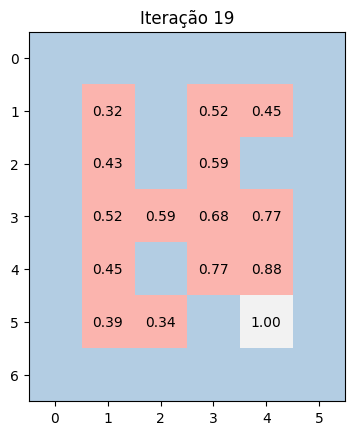

Iteração 20:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.36682834 0.         0.51999204 0.45512219 0.        ]
 [0.         0.44848846 0.         0.59413264 0.         0.        ]
 [0.         0.51999204 0.59413264 0.67692527 0.77096838 0.        ]
 [0.         0.45512219 0.         0.77096838 0.87804875 0.        ]
 [0.         0.39769732 0.34682515 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.04913876943444645



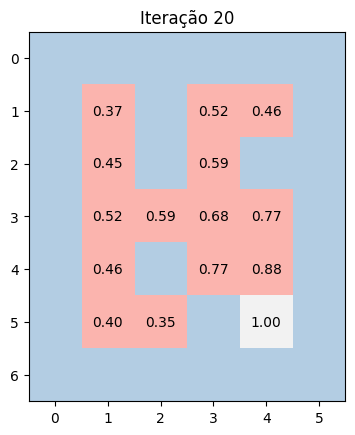

Iteração 21:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.38894079 0.         0.52137407 0.45731132 0.        ]
 [0.         0.45512219 0.         0.59433007 0.         0.        ]
 [0.         0.52137407 0.59433007 0.67694378 0.77096941 0.        ]
 [0.         0.45731132 0.         0.77096941 0.87804877 0.        ]
 [0.         0.40084967 0.35104029 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.022112446245500905



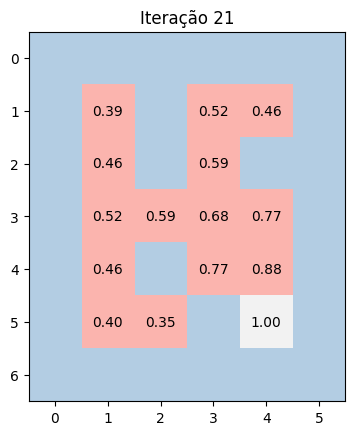

Iteração 22:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.39769732 0.         0.52176498 0.45798683 0.        ]
 [0.         0.45731132 0.         0.59437894 0.         0.        ]
 [0.         0.52176498 0.59437894 0.67694785 0.77096961 0.        ]
 [0.         0.45798683 0.         0.77096961 0.87804878 0.        ]
 [0.         0.40190346 0.35255774 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.008756528713218359



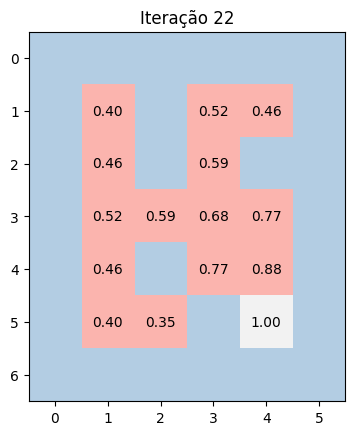

Iteração 23:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40084967 0.         0.52187053 0.45818441 0.        ]
 [0.         0.45798683 0.         0.59439066 0.         0.        ]
 [0.         0.52187053 0.59439066 0.67694873 0.77096965 0.        ]
 [0.         0.45818441 0.         0.77096965 0.87804878 0.        ]
 [0.         0.4022354  0.35306988 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.003152350336758536



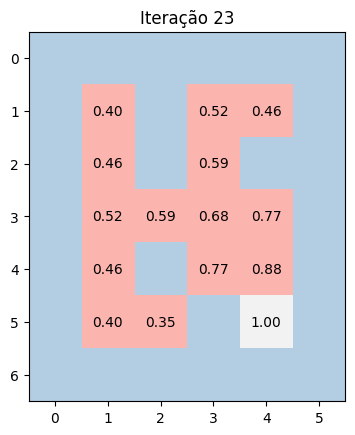

Iteração 24:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40190346 0.         0.52189797 0.45823973 0.        ]
 [0.         0.45818441 0.         0.59439341 0.         0.        ]
 [0.         0.52189797 0.59439341 0.67694892 0.77096966 0.        ]
 [0.         0.45823973 0.         0.77096966 0.87804878 0.        ]
 [0.         0.40233498 0.35323376 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.0010537856840022175



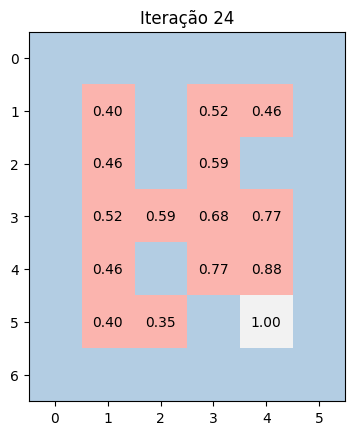

Iteração 25:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.4022354  0.         0.52190489 0.45825467 0.        ]
 [0.         0.45823973 0.         0.59439404 0.         0.        ]
 [0.         0.52190489 0.59439404 0.67694896 0.77096966 0.        ]
 [0.         0.45825467 0.         0.77096966 0.87804878 0.        ]
 [0.         0.40236366 0.35328391 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 0.0003319424904607571



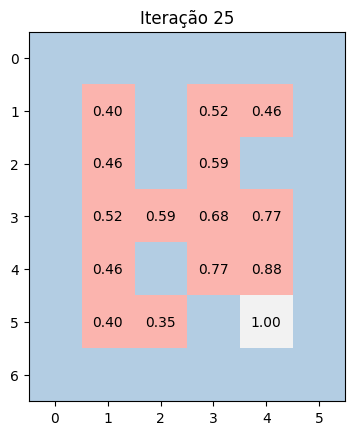

Iteração 26:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40233498 0.         0.52190659 0.45825858 0.        ]
 [0.         0.45825467 0.         0.59439418 0.         0.        ]
 [0.         0.52190659 0.59439418 0.67694897 0.77096966 0.        ]
 [0.         0.45825858 0.         0.77096966 0.87804878 0.        ]
 [0.         0.40237164 0.35329868 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 9.958274713817161e-05



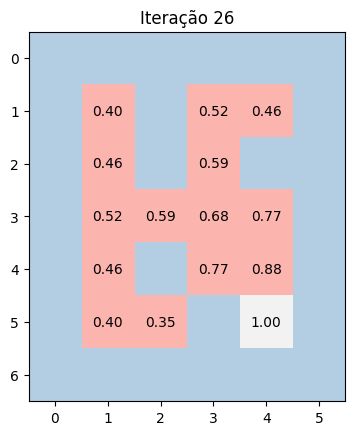

Iteração 27:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40236366 0.         0.52190699 0.45825958 0.        ]
 [0.         0.45825858 0.         0.59439421 0.         0.        ]
 [0.         0.52190699 0.59439421 0.67694897 0.77096966 0.        ]
 [0.         0.45825958 0.         0.77096966 0.87804878 0.        ]
 [0.         0.40237379 0.35330289 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 2.8679831175770776e-05



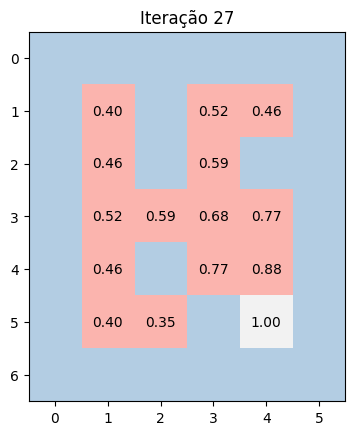

Iteração 28:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40237164 0.         0.52190709 0.45825983 0.        ]
 [0.         0.45825958 0.         0.59439422 0.         0.        ]
 [0.         0.52190709 0.59439422 0.67694897 0.77096966 0.        ]
 [0.         0.45825983 0.         0.77096966 0.87804878 0.        ]
 [0.         0.40237436 0.35330406 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 7.97820758158263e-06



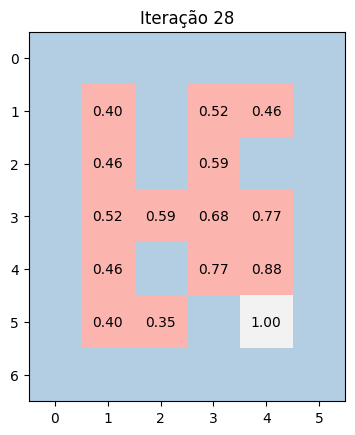

Iteração 29:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40237379 0.         0.52190711 0.45825989 0.        ]
 [0.         0.45825983 0.         0.59439422 0.         0.        ]
 [0.         0.52190711 0.59439422 0.67694897 0.77096966 0.        ]
 [0.         0.45825989 0.         0.77096966 0.87804878 0.        ]
 [0.         0.40237451 0.35330437 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 2.1541160470928133e-06



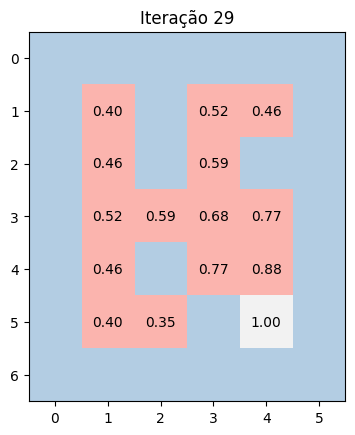

Iteração 30:
Valores de cada estado:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40237436 0.         0.52190712 0.4582599  0.        ]
 [0.         0.45825989 0.         0.59439422 0.         0.        ]
 [0.         0.52190712 0.59439422 0.67694897 0.77096966 0.        ]
 [0.         0.4582599  0.         0.77096966 0.87804878 0.        ]
 [0.         0.40237454 0.35330446 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Delta (Maior diferença entre os valores): 5.666982216268046e-07



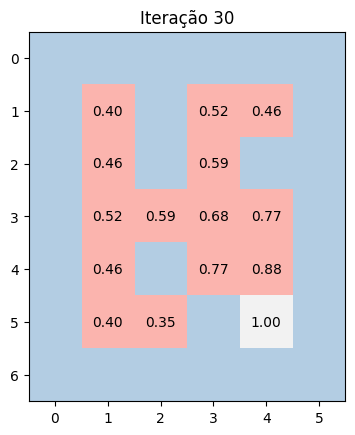

In [35]:
# Algoritmo de iteração de valor
iteration = 10
while True:
    delta = 0
    for row in range(num_rows):
        for col in range(num_cols):
            if maze[row, col] != 1:  # Ignorar paredes
                v = V[row, col]
                max_value = -float('inf')
                best_action = None
                for action in ['up', 'down', 'left', 'right']:
                    action_value = calculate_value((row, col), action)
                    if action_value > max_value:
                        max_value = action_value
                        best_action = action
                V[row, col] = max_value
                delta = max(delta, abs(v - V[row, col]))
    
    # Explicação da iteração atual
    print(f'Iteração {iteration}:')
    print(f'Valores de cada estado:')
    print(V)
    print(f'Delta (Maior diferença entre os valores): {delta}\n')
    
    # Plotar o mapa com os valores atuais
    plt.figure()
    plt.imshow(maze, cmap='Pastel1', interpolation='none')
    for row in range(num_rows):
        for col in range(num_cols):
            if maze[row, col] != 1:
                plt.text(col, row, f'{V[row, col]:.2f}', ha='center', va='center')
    plt.title(f'Iteração {iteration}')
    plt.show()
    
    iteration += 1

    if delta < 1e-6:
        break

# Valores finais e Plots

Valores finais:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.40237436 0.         0.52190712 0.4582599  0.        ]
 [0.         0.45825989 0.         0.59439422 0.         0.        ]
 [0.         0.52190712 0.59439422 0.67694897 0.77096966 0.        ]
 [0.         0.4582599  0.         0.77096966 0.87804878 0.        ]
 [0.         0.40237454 0.35330446 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


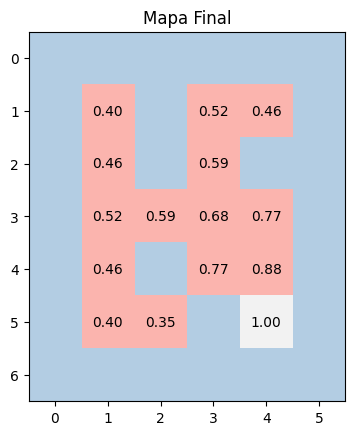

In [36]:
# Imprimir os valores de cada estado final
print("Valores finais:")
print(V)

# Imprimir o mapa final
plt.figure()
plt.imshow(maze, cmap='Pastel1', interpolation='none')
for row in range(num_rows):
    for col in range(num_cols):
        if maze[row, col] != 1:
            plt.text(col, row, f'{V[row, col]:.2f}', ha='center', va='center')
plt.title('Mapa Final')
plt.show()
